In [48]:
import pandas as pd
import numpy as np
import math
import scipy
from scipy import stats
from scipy.stats import ttest_1samp, ttest_ind
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

In [3]:
os.getcwd()

'C:\\Users\\Ananth\\Downloads\\SMDM\\project'

In [35]:
df = pd.read_csv('Survey-1.csv')

In [5]:
df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [6]:
# 2.1.1:
df_crosstab1 = pd.crosstab(df['Gender'], df['Major'], margins = False)
print(df_crosstab1)

Major   Accounting  CIS  Economics/Finance  International Business  \
Gender                                                               
Female           3    3                  7                       4   
Male             4    1                  4                       2   

Major   Management  Other  Retailing/Marketing  Undecided  
Gender                                                     
Female           4      3                    9          0  
Male             6      4                    5          3  


In [8]:
# 2.1.2:
df_crosstab2 = pd.crosstab(df['Gender'], df['Grad Intention'], margins = False)
print(df_crosstab2)

Grad Intention  No  Undecided  Yes
Gender                            
Female           9         13   11
Male             3          9   17


In [9]:
#2.1.3:
df_crosstab3 = pd.crosstab(df['Gender'], df['Employment'], margins = False)
print(df_crosstab3)

Employment  Full-Time  Part-Time  Unemployed
Gender                                      
Female              3         24           6
Male                7         19           3


In [10]:
#2.1.4:
df_crosstab4 = pd.crosstab(df['Gender'], df['Computer'], margins = False)
print(df_crosstab4)

Computer  Desktop  Laptop  Tablet
Gender                           
Female          2      29       2
Male            3      26       0


In [4]:
#2.2.1:
df_crosstab5 = pd.crosstab([df.Gender, df.Major], df.Employment, margins = False)
print(df_crosstab5)

Employment                     Full-Time  Part-Time  Unemployed
Gender Major                                                   
Female Accounting                      0          3           0
       CIS                             0          3           0
       Economics/Finance               1          5           1
       International Business          0          4           0
       Management                      0          1           3
       Other                           2          1           0
       Retailing/Marketing             0          7           2
Male   Accounting                      1          2           1
       CIS                             1          0           0
       Economics/Finance               1          3           0
       International Business          0          2           0
       Management                      1          5           0
       Other                           0          3           1
       Retailing/Marketing             1

In [16]:
df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [17]:
df_crosstab5.sum()

Employment
Full-Time     10
Part-Time     43
Unemployed     9
dtype: int64

In [6]:
# Probability of a randomly selected CMSU student is a male = male students / Total number of students
male_students = 29
Total_number_of_students = 62
prob_male = (male_students/Total_number_of_students)*100
print("The probability of a randomly selected CMSU student is a male is ", prob_male, "%")

The probability of a randomly selected CMSU student is a male is  46.774193548387096 %


In [7]:
#2.2.2:
female_students = 33
prob_female = (female_students/Total_number_of_students)*100
print("The probability of a randomly selected CMSU student is a female is ", prob_female, "%")

The probability of a randomly selected CMSU student is a female is  53.2258064516129 %


In [5]:
#2.3.1:
sum_total = df_crosstab5['Full-Time'] + df_crosstab5['Part-Time'] + df_crosstab5['Unemployed']
df_crosstab5['Total_Sum'] = sum_total
df_crosstab5.loc['Total'] = df_crosstab5.sum()
df_crosstab5

Employment,Full-Time,Part-Time,Unemployed,Total_Sum
"(Female, Accounting)",0,3,0,3
"(Female, CIS)",0,3,0,3
"(Female, Economics/Finance)",1,5,1,7
"(Female, International Business)",0,4,0,4
"(Female, Management)",0,1,3,4
"(Female, Other)",2,1,0,3
"(Female, Retailing/Marketing)",0,7,2,9
"(Male, Accounting)",1,2,1,4
"(Male, CIS)",1,0,0,1
"(Male, Economics/Finance)",1,3,0,4


In [33]:
# P(Accounting|Male) = Number of males in accounting / Total Number of males
accounting_male = 4
male_students = 29
cond_prob_accounting_male = (accounting_male/male_students)*100
print("The conditional probability of Accounting among the male students is ", cond_prob_accounting_male, "%")

The conditional probability of Accounting among the male students is  13.793103448275861 %


In [34]:
cis_male = 1
cond_prob_cis_male = (cis_male/male_students)*100
print("The conditional probability of CIS among the male students is ", cond_prob_cis_male, "%")

The conditional probability of CIS among the male students is  3.4482758620689653 %


In [35]:
economics_finance_male = 4
cond_prob_economicsfinance_male = (economics_finance_male/male_students)*100
print("The conditional probability of Economics/Finance among the male students is ", cond_prob_economicsfinance_male, "%")

The conditional probability of Economics/Finance among the male students is  13.793103448275861 %


In [36]:
international_business_male = 2
cond_prob_internationalbusiness_male = (international_business_male/male_students)*100
print("The conditional probability of International Business among the male students is ", cond_prob_internationalbusiness_male, "%")

The conditional probability of International Business among the male students is  6.896551724137931 %


In [37]:
management_male = 6
cond_prob_management_male = (management_male/male_students)*100
print("The conditional probability of Management among the male students is ", cond_prob_management_male, "%")

The conditional probability of Management among the male students is  20.689655172413794 %


In [38]:
other_male = 4
cond_prob_other_male = (other_male/male_students)*100
print("The conditional probability of Other among male students is ", cond_prob_other_male, "%")

The conditional probability of Other among male students is  13.793103448275861 %


In [39]:
retailing_marketing_male = 5
cond_prob_retailing_marketing_male = (retailing_marketing_male/male_students)*100
print("The conditional probability of Retailing/Marketing among male students is ", cond_prob_retailing_marketing_male, "%")

The conditional probability of Retailing/Marketing among male students is  17.24137931034483 %


In [40]:
undecided_male = 3
cond_prob_undecided_male = (undecided_male/male_students)*100
print("The conditional probability of undecided among male students is ", cond_prob_undecided_male, "%")

The conditional probability of undecided among male students is  10.344827586206897 %


In [9]:
#2.3.2:
accounting_female = 3
female_students = 33
cond_prob_accounting_female = (accounting_female/female_students)*100
print("The conditional probability of Accounting among the female students is ", cond_prob_accounting_female, "%")

The conditional probability of Accounting among the female students is  9.090909090909092 %


In [10]:
cis_female = 1
cond_prob_cis_female = (cis_female/female_students)*100
print("The conditional probability of CIS among the female students is ", cond_prob_cis_female, "%")

The conditional probability of CIS among the female students is  3.0303030303030303 %


In [11]:
economics_finance_female = 4
cond_prob_economicsfinance_female = (economics_finance_female/female_students)*100
print("The conditional probability of Economics/Finance among the female students is ", cond_prob_economicsfinance_female, "%")

The conditional probability of Economics/Finance among the female students is  12.121212121212121 %


In [12]:
international_business_female = 2
cond_prob_internationalbusiness_female = (international_business_female/female_students)*100
print("The conditional probability of International Business among the female students is ", cond_prob_internationalbusiness_female, "%")

The conditional probability of International Business among the female students is  6.0606060606060606 %


In [13]:
management_female = 6
cond_prob_management_female = (management_female/female_students)*100
print("The conditional probability of Management among the female students is ", cond_prob_management_female, "%")

The conditional probability of Management among the female students is  18.181818181818183 %


In [14]:
other_female = 4
cond_prob_other_female = (other_female/female_students)*100
print("The conditional probability of Other among female students is ", cond_prob_other_female, "%")

The conditional probability of Other among female students is  12.121212121212121 %


In [15]:
retailing_marketing_female = 5
cond_prob_retailing_marketing_female = (retailing_marketing_female/female_students)*100
print("The conditional probability of Retailing/Marketing among female students is ", cond_prob_retailing_marketing_female, "%")

The conditional probability of Retailing/Marketing among female students is  15.151515151515152 %


In [16]:
undecided_female = 3
cond_prob_undecided_female = (undecided_female/female_students)*100
print("The conditional probability of undecided among female students is ", cond_prob_undecided_female, "%")

The conditional probability of undecided among female students is  9.090909090909092 %


In [26]:
#2.4.a:
crosstab_6 = pd.crosstab(df['Gender'], df['Grad Intention'], margins = False)
crosstab_6
crosstab_6['Total'] = crosstab_6.sum(axis = 1)
crosstab_6.loc['Total'] = crosstab_6.sum()
crosstab_6

Grad Intention,No,Undecided,Yes,Total
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
Total,12,22,28,62


In [ ]:
# Probability of all the males P(A) = 29/62 = 0.467
#  Probability of a student who intends to graduate P(B) = 28/62 = 0.4516
# Probability of a male student given that he intends to graduate = P(A|B) = 17/28 = 0.607
# Now as per the formula, P(A and B) = P(B) * P(A|B)
# P(A and B) = 0.4516 * 0.607 = 0.27 or 27% probability
# The Probability that a randomly chosen student is a male and intends to graduate is 0.27.

In [3]:
# 2.4.b: 
crosstab_6b = pd.crosstab(df['Gender'], df['Computer'], margins = False)
crosstab_6b['Total'] = crosstab_6b.sum(axis = 1)
crosstab_6b.loc['Total'] = crosstab_6b.sum()
crosstab_6b
# Probability of a female student P(A) = 33/62 = 0.53
# Probability of having a laptop = 55/62 = 0.88
# Probability of not having a laptop P(B) = (1 - 0.88) = 0.11
# Now as per the formula, P(A and B) = P(B) * P(A|B)
# P(A|B) = 0.57
# P(A and B) = 0.57 * 0.11 = 0.06
# Probability that a randomly selected student is a female and does not have a laptop is 0.06

Computer,Desktop,Laptop,Tablet,Total
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
Total,5,55,2,62


In [ ]:
# 2.5.1:
# Let, P(A) denote the probability of being a male and let P(B) denote the probability of having a full time employment.
# Here, P(A or B) is asked where the events are non-mutually exclusive, so P(A or B) = P(A) + P(B) - P(A and B)
# From df_crosstab5, we see that P(A) = 29/62 = 0.467
# P(B) = 10/62 = 0.161
# P(A and B) = 7/62 = 0.112
# P(A or B) = 0.467 + 0.161 - 0.112 = 0.516
# Hence the probability that a randomly selected student is either a male or has a full time employment is 0.51

In [39]:
#2.5.2:
extract1 = df[df['Major'].isin(['International Business','Management'])]
extract1

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
12,13,Male,22,Senior,International Business,Undecided,3.4,Part-Time,40.0,2,3,400,Desktop,45
13,14,Male,22,Senior,International Business,Undecided,3.1,Part-Time,40.0,1,3,400,Laptop,150
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
15,16,Male,24,Senior,Management,Undecided,3.4,Part-Time,45.0,4,4,500,Laptop,175
19,20,Female,20,Junior,Management,Undecided,3.2,Unemployed,60.0,2,6,300,Laptop,350
25,26,Male,24,Senior,Management,Yes,3.3,Full-Time,60.0,0,1,300,Laptop,40
27,28,Female,20,Junior,International Business,Yes,2.9,Part-Time,50.0,3,1,900,Laptop,100
36,37,Male,21,Senior,Management,Yes,3.1,Part-Time,40.0,1,4,500,Laptop,100


In [42]:
crosstab_7 = pd.crosstab(extract1['Gender'],extract1['Major'], margins = False)
crosstab_7['Total'] = crosstab_7.sum(axis = 1)
crosstab_7.loc['Total'] = crosstab_7.sum()
crosstab_7

Major,International Business,Management,Total
Gender,,,
Female,4,4,8
Male,2,6,8
Total,6,10,16


In [ ]:
# Probability that a randomly selected female will be majoring in International Business OR Management:
# P(International business or Management | Female) = 8 / 33 = 0.24
# Probability that a randomly selected female will be majoring in International Business OR Management is 0.24

In [4]:
# 2.6 :
extract2 = df[df['Grad Intention'].isin(['Yes','No'])]
extract2

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
10,11,Female,23,Senior,Economics/Finance,Yes,2.8,Full-Time,50.0,2,5,400,Laptop,200
11,12,Male,21,Senior,Undecided,No,3.5,Full-Time,37.0,2,3,500,Laptop,100
14,15,Male,21,Senior,Management,Yes,3.2,Part-Time,54.0,3,4,600,Laptop,400
18,19,Male,19,Junior,Economics/Finance,Yes,3.5,Part-Time,52.0,2,5,500,Laptop,300
23,24,Male,22,Senior,Undecided,Yes,2.6,Full-Time,45.0,1,5,400,Laptop,600


In [5]:
crosstab8 = pd.crosstab(extract2['Gender'], extract2['Grad Intention'], margins = False)
crosstab8['Total'] = crosstab8.sum(axis = 1)
crosstab8.loc['Total'] = crosstab8.sum()
crosstab8

Grad Intention,No,Yes,Total
Gender,,,
Female,9,11,20
Male,3,17,20
Total,12,28,40


In [ ]:
# Given that P(A) = Being a female = 20/40 = 0.5
# Given that P(B) = Grad intention Yes = 28/40 = 0.7
# If two events are independent, P(Female and Yes) = P(A) * P(B) = 0.50 * 0.7 = 0.37
# To check if two events are independent if P(A|B) = P(A) and P(B|A) = P(B):
# P(A|B) = 11/28 = 0.39
# P(A) = 0.5 is not equal to P(A|B), i.e: not equal to 0.39
# P(B|A) = 11/20 = 0.55
# P(B) = 0.7
# So, P(B|A) = 0.55 which is not equal to P(B) = 0.7
# So the two events are not independent. So for dependent events, P(A and B) = P(A) * P(B|A)
# P(B|A) = 11/20 = 0.55 
# P(A and B) = 0.55* 0.5 = 0.275

In [15]:
# 2.7.1:
df2 = pd.DataFrame(df, columns = ['Gender','GPA', 'Salary'])
df2

,Gender,GPA,Salary
0,Female,2.9,50.0
1,Male,3.6,25.0
2,Male,2.5,45.0
3,Male,2.5,40.0
4,Male,2.8,40.0
...,...,...,...
57,Female,2.4,40.0
58,Female,2.9,40.0
59,Female,2.5,55.0
60,Female,3.5,30.0


In [21]:
df2_filtered = df2[df2['GPA']<3]
df2_filtered['Total'] = df2_filtered.sum(axis = 1)
df2_filtered.loc['Total'] = df2_filtered.sum()
df2_filtered

<ipython-input-21-78f865b9d0f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['Total'] = df2_filtered.sum(axis = 1)


,Gender,GPA,Salary,Total
0,Female,2.9,50.0,52.9
2,Male,2.5,45.0,47.5
3,Male,2.5,40.0,42.5
4,Male,2.8,40.0,42.8
5,Female,2.3,78.0,80.3
10,Female,2.8,50.0,52.8
23,Male,2.6,45.0,47.6
27,Female,2.9,50.0,52.9
31,Male,2.9,47.0,49.9
33,Male,2.6,40.0,42.6


In [22]:
df2_filtered.count()

Gender    18
GPA       18
Salary    18
Total     18
dtype: int64

In [ ]:
# Probability of a student who is randomly chosen, that his GPA is less than 3 = Number of students with GPA less than 3/ Total number of students
# = 18/62 = 0.2903

In [23]:
#2.7.2.a:
df3 = df2[df2['Salary']>=50]
df3['Total'] = df3.sum(axis = 1)
df3.loc['Total'] = df3.sum()
df3

<ipython-input-23-2331256923b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Total'] = df3.sum(axis = 1)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Gender,GPA,Salary,Total
0,Female,2.9,50.0,52.9
5,Female,2.3,78.0,80.3
6,Female,3.0,50.0,53.0
7,Female,3.1,80.0,83.1
10,Female,2.8,50.0,52.8
14,Male,3.2,54.0,57.2
16,Female,3.7,55.0,58.7
17,Male,3.1,55.0,58.1
18,Male,3.5,52.0,55.5
19,Female,3.2,60.0,63.2


In [31]:
# 2.7.2.a:
# Probability that a randomly chosen male earns 50 or more = Number of male earning 50 or more/ Total number of male
male50 = df3[df3['Gender']=='Male']
male50.count()

Gender    14
GPA       14
Salary    14
Total     14
dtype: int64

In [34]:
# Number of Male earning 50 or more = 14
# Total number of Male = 29
# Probability that a randomly chosen male earns 50 or more = 14/29 = 0.48


In [33]:
#2.7.2.b:
female50 = df3[df3['Gender']=='Female']
female50.count()

Gender    18
GPA       18
Salary    18
Total     18
dtype: int64

In [ ]:
# Number of Female earning 50 or more = 18
# Total number of Female = 33
# Probability that a randomly chosen female earns 50 or more = 18/33 = 0.54

In [37]:
#2.8:
df4 = pd.DataFrame(df, columns = ['GPA', 'Salary', 'Spending', 'Text Messages'])
df4

,GPA,Salary,Spending,Text Messages
0,2.9,50.0,350,200
1,3.6,25.0,360,50
2,2.5,45.0,600,200
3,2.5,40.0,600,250
4,2.8,40.0,500,100
...,...,...,...,...
57,2.4,40.0,1000,10
58,2.9,40.0,350,250
59,2.5,55.0,500,500
60,3.5,30.0,490,50


In [38]:
df4.describe()

,GPA,Salary,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000
mean,3.129032,48.548387,482.016129,246.209677
std,0.377388,12.080912,221.953805,214.465950
min,2.300000,25.000000,100.000000,0.000000
25%,2.900000,40.000000,312.500000,100.000000
50%,3.150000,50.000000,500.000000,200.000000
75%,3.400000,55.000000,600.000000,300.000000
max,3.900000,80.000000,1400.000000,900.000000


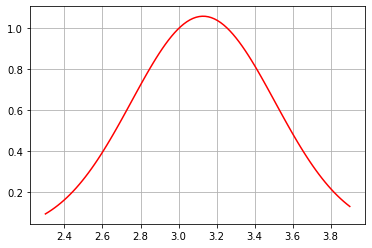

In [50]:
# Here, x_min and x_max denote the minimum and maximum values of the GPA variable.
# mean and std denote the mean and standard deviation of the GPA variable.
x_min = 2.30
x_max = 3.90
mean = 3.129
std = 0.377
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x, mean, std)
plt.plot(x,y, color = 'Red')
plt.grid()
plt.show()

In [ ]:
# This is to show that the GPA follows a Normal distribution
# This shows that 68% of data fall between +/- 0.37 from the mean, 95% of data fall between +/- 0.74 from the mean and 99.7% of all the data fall between +/- 1.11 from the mean.
# The data is perfectly symmetrical distribution for the GPA variable.

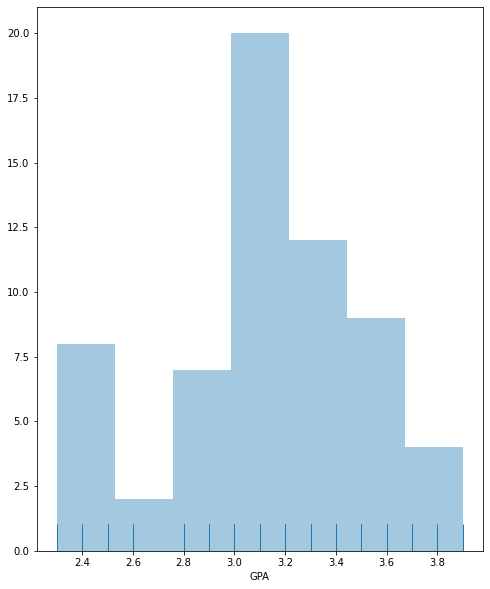

In [41]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['GPA'], kde = False, rug = True);

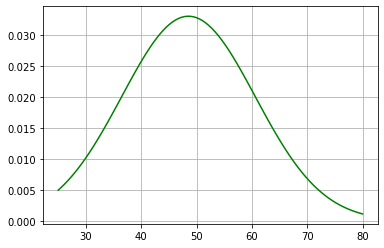

In [52]:
# Here, x1_min and x1_max denote the minimum and maximum values of the Salary variable.
# mean1 and std1 denote the mean and standard deviation of the Salary variable.
x1_min = 25
x1_max = 80
mean1 = 48.548
std1 = 12.08
x = np.linspace(x1_min, x1_max, 100)
y = scipy.stats.norm.pdf(x, mean1, std1)
plt.plot(x,y, color = 'Green')
plt.grid()
plt.show()

In [ ]:
# As we can see, the Salary is approximately showing a Normal distribution
# This shows that 68% of data fall between +/- 12.08 from the mean, 95% of data fall between +/- 24.16 from the mean and 99.7% of all the data fall between +/- 36.24 from the mean.
# The distribution for the Salary is a slightly right skewed or positive skewed distribution.

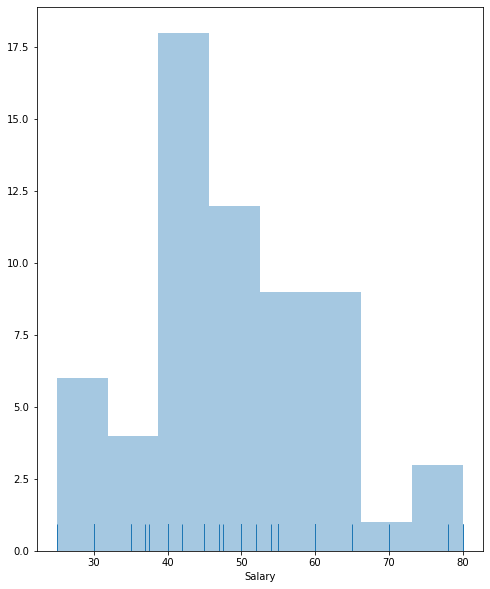

In [45]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['Salary'], kde = False, rug = True);

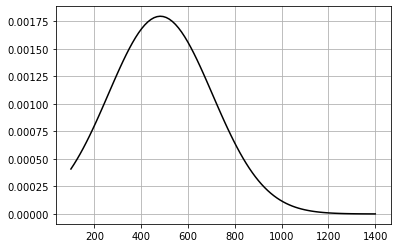

In [53]:
# Here, x2_min and x2_max denote the minimum and maximum values of the Spending variable.
# mean2 and std2 denote the mean and standard deviation of the Spending variable.
x2_min = 100
x2_max = 1400
mean2 = 482.016
std2 = 221.953805
x = np.linspace(x2_min, x2_max, 100)
y = scipy.stats.norm.pdf(x, mean2, std2)
plt.plot(x,y, color = 'Black')
plt.grid()
plt.show()

In [ ]:
# The Spending is showing a perfectly normal distribution until the value of 850.
# This shows that 68% of data fall between +/- 221.953 from the mean, 95% of data fall between +/- 443.906 from the mean and 99.7% of all the data fall between +/- 665.859 from the mean.
# It is clearly seen that the Spending distribution is a right tailed, or a positively skewed.

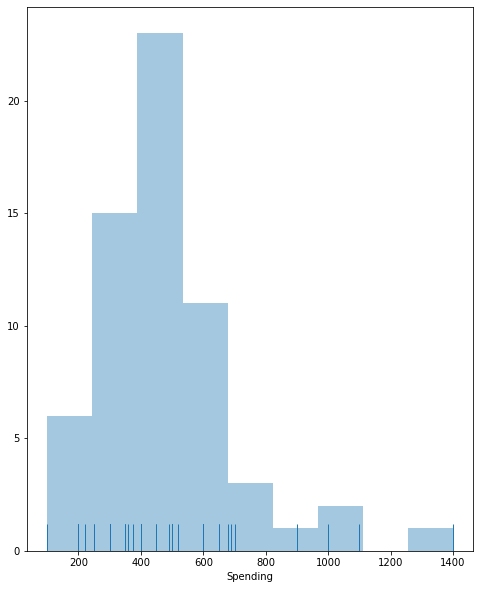

In [46]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['Spending'], kde = False, rug = True);

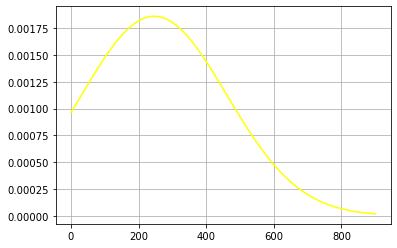

In [54]:
# Here, x3_min and x3_max denote the minimum and maximum values of the Text Messages variable.
# mean3 and std3 denote the mean and standard deviation of the Text Messages variable.
x3_min = 0
x3_max = 900
mean3 = 246.209677
std3 = 214.465950
x = np.linspace(x3_min, x3_max, 100)
y = scipy.stats.norm.pdf(x, mean3, std3)
plt.plot(x,y, color = 'Yellow')
plt.grid()
plt.show()

In [ ]:
# The Text Messages is showing a normal distribution until the first 500 counts.
# This shows that 68% of data fall between +/- 214.465 from the mean, 95% of data fall between +/- 428.93 from the mean and 99.7% of all the data fall between +/- 643.395 from the mean.
# The Text Messages ditribution is a fully right skewed or a right tailed distribution.

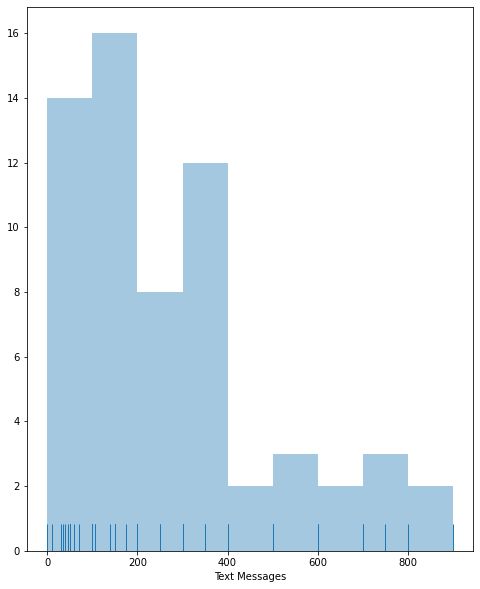

In [47]:
ax = plt.subplots(figsize = (8,10))
sns.distplot(df4['Text Messages'], kde = False, rug = True);